# Import all the required libraries 
inline statement - displays the graphs in the current notebook

In [212]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split

Read the train.csv file into DataFrame house_prices

In [213]:
house_prices = pd.read_csv("E:\Data Science\Capstone Project - House prices\Datasets\\train.csv")

In [214]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


h_p is the copy of DataFrame h_p

In [215]:
h_p = house_prices.copy()

In [216]:
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The house_prices dataframe contains quite of bit a unknown data. Missing values can lead to misinterpretation of the data. Therefore it is very important to tidy up the dataset. 

Following general standards, I dropped columns with at least 20% missing data. 

Calculate columns having null values of more than 20% of the total data (records in each column)

In [217]:
h_p.columns[h_p.isnull().sum() > ((len(h_p)* 20)/100)].tolist()


['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

I have decided to drop the columns 'Alley', 'FireplaceQu', 'PoolQC' , 'Fence', 'MiscFeature' - as there are more than 20% null values in each of these columns.  

In [218]:
# Used get_loc() method to obtain the locations of each column (6,57,72,73,74)
h_p.drop(h_p.columns[[6,57,72,73,74]], axis=1, inplace=True)

In [219]:
h_p.shape

(1460, 76)

In [220]:
# Displays the data types and non-null values of h_p
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [221]:
h_p.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# DATA MUNGING & DATA CLEANING

Some of the columns in the housing prices data contain null values. I used "padding method" for the categorical variables to fill the missing data. 

Also I have replaced the column values - 'NA - No Basement' with 'NoBsmnt' and 'NA - No Garage' with 'NoGrg' - I did this for my convinience, it is absolutely not mandatory

In [222]:
h_p['MasVnrType'].fillna(method='pad', inplace= True)

In [223]:
h_p['BsmtQual'].replace('NA', 'NoBsmnt', inplace=True)

In [224]:
h_p['BsmtQual'].fillna(method='pad', inplace=True)

In [225]:
h_p['BsmtCond'].replace('NA', 'NoBsmnt', inplace=True)

In [226]:
h_p['BsmtCond'].fillna(method='pad', inplace=True)

In [227]:
h_p['BsmtExposure'].replace('NA', 'NoBsmnt', inplace=True)

In [228]:
h_p['BsmtExposure'].fillna(method='pad', inplace=True)

In [229]:
h_p['BsmtFinType1'].replace('NA', 'NoBsmnt', inplace=True)

In [230]:
h_p['BsmtFinType1'].fillna(method='pad', inplace=True)

In [231]:
h_p['BsmtFinType2'].replace('NA', 'NoBsmnt', inplace=True)

In [232]:
h_p['BsmtFinType2'].fillna(method='pad', inplace=True)

In [233]:
h_p['GarageType'].replace('NA', 'NoGrg', inplace=True)

In [234]:
h_p['GarageType'].fillna(method='pad', inplace=True)

In [235]:
h_p['GarageFinish'].replace('NA', 'NoGrg', inplace=True)

In [236]:
h_p['GarageFinish'].fillna(method='pad', inplace=True)

In [237]:
h_p['GarageCond'].replace('NA', 'NoGrg', inplace=True)

In [238]:
h_p['GarageCond'].fillna(method='pad', inplace=True)

In [239]:
h_p['GarageQual'].replace('NA', 'NoGrg', inplace=True)

In [240]:
h_p['GarageQual'].fillna(method='pad', inplace=True)

In [241]:
h_p['Electrical'].fillna(method='pad', inplace=True)

Checking if the Dataframe has any null values

In [242]:
h_p.isnull().values.any()

True

In [243]:
h_p.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
                ... 
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond   

Numerical variables like LotFrontage, GarageYrBlt, MasVnrArea have null values. I used imputation - mean of the values of a column to deal with missing data.

In [244]:
h_p['LotFrontage'].interpolate(method='linear', axis=0, inplace=True)

In [245]:
h_p['GarageYrBlt'].interpolate(method='linear', axis=0, inplace=True)

In [246]:
h_p['MasVnrArea'].interpolate(method='linear', axis=0, inplace=True)

DataFrame is clean without any missing values

In [247]:
h_p.isnull().values.any()

False

After studying all the varibles carefully, I analysed what important factors would I consider if I am buying a house. 

Some of the things that came to my mind are :
1. House Condition - OverallQual
2. Location - Neighborhood
3. House Age - YearBuilt
4. Finished/ Unfinished Basement - BsmtCond

I picked related four columns that might effect the final sale price of the house.

In [248]:
hpdf = h_p[['Neighborhood', 'OverallQual', 'YearBuilt', 'BsmtCond']]

In [249]:
np.sort(hpdf['Neighborhood'].unique())

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

In [250]:
np.sort(hpdf['BsmtCond'].unique())

array(['Fa', 'Gd', 'Po', 'TA'], dtype=object)

The algorithm fed into Machine learning should only contain numerical values. Therefore categorical variables like 'Neighborhood' and 'BsmtCond' should be converted into numerical. 

One way to convert categorical to numerical is using 'Label Encoding' - all the categories are given numbers ranging from 0 to so on.. The disadvantage here is the algorithm might treat these values as 'Ordinal' and rank them accordingly. This can be completely misleading. 

Hence to avoid this, I created dummy variables for the categorical variables - 'Neighborhood', 'BsmtCond'

In [251]:
hpdf_dummies = pd.get_dummies(hpdf, columns=['Neighborhood', 'BsmtCond'])

To make things easier I added a column 'Age' to calculate age of the house and dropped the column 'YearBuilt'

In [252]:
hpdf_dummies['Age'] = (dt.datetime.now()).year - hpdf_dummies['YearBuilt'] 

In [253]:
hpdf_dummies.drop(['YearBuilt'], axis=1, inplace=True)

In [254]:
hpdf_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
OverallQual             1460 non-null int64
Neighborhood_Blmngtn    1460 non-null uint8
Neighborhood_Blueste    1460 non-null uint8
Neighborhood_BrDale     1460 non-null uint8
Neighborhood_BrkSide    1460 non-null uint8
Neighborhood_ClearCr    1460 non-null uint8
Neighborhood_CollgCr    1460 non-null uint8
Neighborhood_Crawfor    1460 non-null uint8
Neighborhood_Edwards    1460 non-null uint8
Neighborhood_Gilbert    1460 non-null uint8
Neighborhood_IDOTRR     1460 non-null uint8
Neighborhood_MeadowV    1460 non-null uint8
Neighborhood_Mitchel    1460 non-null uint8
Neighborhood_NAmes      1460 non-null uint8
Neighborhood_NPkVill    1460 non-null uint8
Neighborhood_NWAmes     1460 non-null uint8
Neighborhood_NoRidge    1460 non-null uint8
Neighborhood_NridgHt    1460 non-null uint8
Neighborhood_OldTown    1460 non-null uint8
Neighborhood_SWISU      1460 non-null uint8
Neighborhood_

In [255]:
hpdf_dummies.columns.get_loc('BsmtCond_Gd')

27

In [257]:
output = h_p['SalePrice']

# Split the dataframe into training set and test set

I split the dataframe into Training set - 80% and Test set - 20%

In [258]:
hpdf_dummies_train, hpdf_dummies_test, output_train, output_test = train_test_split(hpdf_dummies, output, 
                                                                          test_size=0.2, random_state=0)

Examine the test and train sets

In [259]:
hpdf_dummies_train.shape

(1168, 31)

In [260]:
hpdf_dummies_test.shape

(292, 31)

In [261]:
output_train.shape

(1168,)

In [262]:
output_test.shape

(292,)

In [263]:
# ------------------------------------------------------------------

In [264]:
#hpdf_dummies_neighborhood = hpdf_dummies.copy()

In [265]:
#hpdf_dummies_neighborhood.drop(hpdf_dummies_neighborhood.columns[[0,26,27,28,29,30]],axis=1, inplace=True)

In [266]:
#hpdf_dummies_neighborhood.head()

The variables 'Neighborhood' and 'BsmtCond' are categorical variables. Hence they have to be converted to numeric since the machine learning algorithm only takes numeric inputs.

This can be achieved by Label Encoding supported by Python's Machine Learning library scikit.

In [267]:
#labelencoder_hpdf = LabelEncoder()
#hpdf.values[:, 0] = labelencoder_hpdf.fit_transform(hpdf.values[:, 0])

In [268]:
hpdf

,Neighborhood,OverallQual,YearBuilt,BsmtCond
0,CollgCr,7,2003,TA
1,Veenker,6,1976,TA
2,CollgCr,7,2001,TA
3,Crawfor,7,1915,Gd
4,NoRidge,8,2000,TA
5,Mitchel,5,1993,TA
6,Somerst,8,2004,TA
7,NWAmes,7,1973,TA
8,OldTown,7,1931,TA
9,BrkSide,5,1939,TA


# Divided the dataframe into - numerical and categorical

Numerical variables - h_p_numerical

In [269]:
h_p_numerical = h_p.select_dtypes(include = [np.number])

In [320]:
h_p_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [321]:
h_p_numerical.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.205479,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.586644,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,23.051007,9981.264932,1.382997,1.112799,30.202904,20.645407,180.728103,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.500000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Categorical variables - h_p_categorical

In [316]:
h_p_categorical = h_p.select_dtypes(include = [object])

In [317]:
h_p_categorical = h_p_categorical.apply(lambda x: x.astype('category'))

In [318]:
h_p_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
MSZoning         1460 non-null category
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType       1460 non-null category
ExterQual        1460 non-null category
ExterCond        1460 non-null category
Foundation       1460 non-null category
BsmtQual         1460 non-null category
BsmtCond         1460 non-null category
BsmtExposure 

In [319]:
h_p_categorical.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1335,735,1360,914,638,1385,1404,1340,1267,1198


I used Pearson correlation on resultant variable 'Sale Price' to find out the strongest correlated variables that effect the final sale price of the house

In [270]:
h_p_numerical_corr = h_p_numerical.corr(method='pearson')['SalePrice']

In [271]:
h_p_numerical_corr[np.argsort(h_p_numerical_corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.474279
GarageYrBlt      0.467290
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotFrontage      0.310673
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

(5) major variables that are strongly correlated with the 'Sale Price'

In [272]:
h_p_numerical_corr.sort_values(ascending = False).head(6)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [273]:
h_p_numerical_topfive = h_p_numerical[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']]

# Exploratory Data Analysis 

# Numerical data - EDA

Let us first get an idea of how each variable is related to the other

This can be made convinient through plotting pairplot in Seaborn

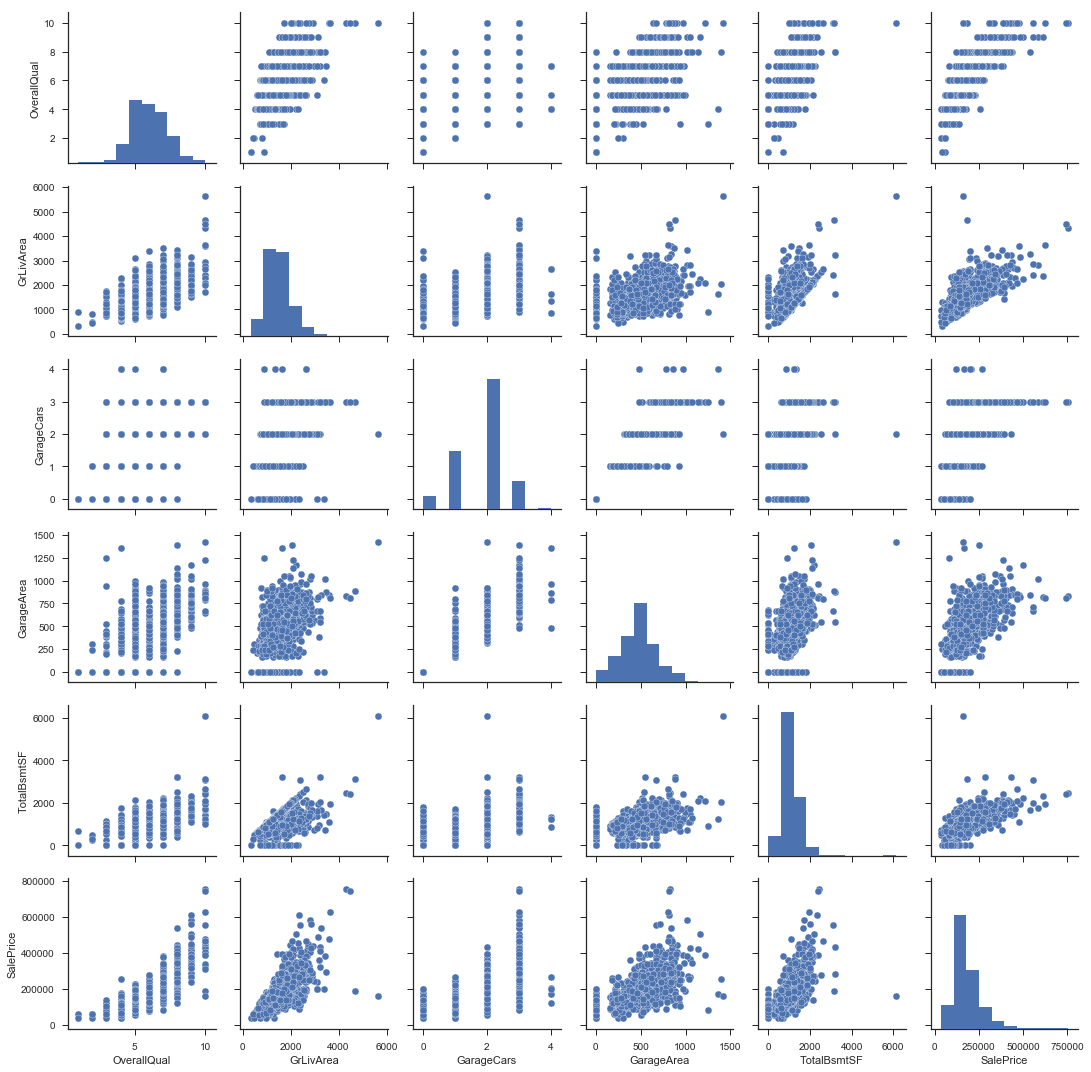

In [274]:
sns.set_style('white')
sns.set_style('ticks')
sns.pairplot(h_p_numerical_topfive)

Let us explore the correlation between each of the above numerical variables (top 5) in more detail

Minimum Ground living area of a house ranging from quality 3-10 is 1000 sqft

From the boxplot it is evident that Overall Quality of the house and Ground Living Area are positively correlated. The better the house quality the more the Ground Living Area. Also from the median of each box plot we can say that the 'average Ground Living Area' increases with increase in quality

Note: Above Grade Area - the part of the dwelling that is above the ground line.

Eg: 1st, 2nd.. floors (which are above the ground area)

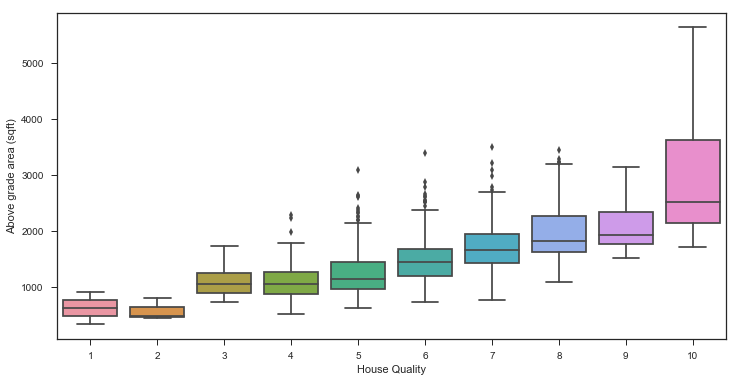

In [299]:
sns.set_style('white')
sns.set_style('ticks')
plt.figure(figsize=(12,6))
g = sns.boxplot(x='OverallQual', y='GrLivArea', data=h_p_numerical)
g.set(xlabel='House Quality', ylabel='Above grade area (sqft)')

From the bar plot we can say that Overall Quality and Garage cars are positively correlated. 

High quality houses can accommodate more number of cars in garage (obviously garage area is bigger)

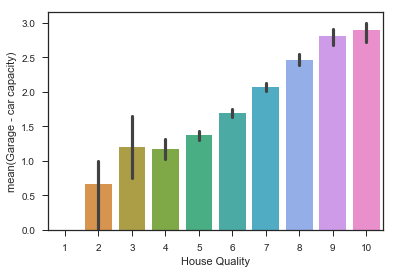

In [276]:
sns.set_style('white')
sns.set_style('ticks')
g= sns.barplot(x='OverallQual', y='GarageCars', data=h_p_numerical)
g.set(xlabel='House Quality', ylabel='mean(Garage - car capacity)')

There are a few houses with no garages. 

All the houses ranked above 5 (house quality) have mimium Garage Area with 100 sqft

Also on an average high quality houses have larger garage areas

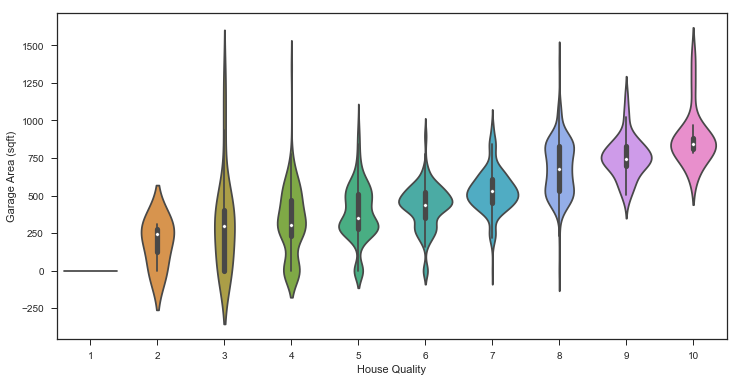

In [309]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g = sns.violinplot(x='OverallQual', y='GarageArea', data=h_p_numerical)
g.set(xlabel='House Quality', ylabel='Garage Area (sqft)')

Basement areas range from 300 sqft to 2700 sqft

Overall Quality and Basement area show linear corelation, good quality houses have larger basement

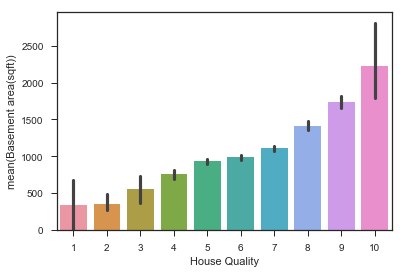

In [297]:
sns.set_style('white')
sns.set_style('ticks')
p = sns.barplot(x='OverallQual', y='TotalBsmtSF', data=h_p_numerical)
p.set(xlabel='House Quality', ylabel='mean(Basement area(sqft))')

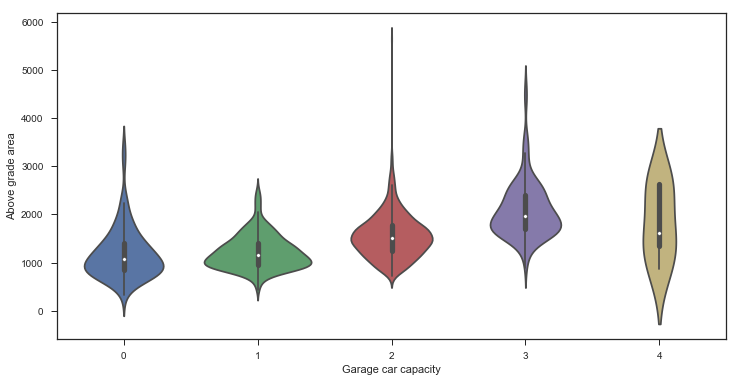

In [308]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
p= sns.violinplot(x='GarageCars', y='GrLivArea', data=h_p_numerical)
p.set(xlabel='Garage car capacity', ylabel='Above grade area')

There seems to be a positive correlation between Garage area and Above grade area. 

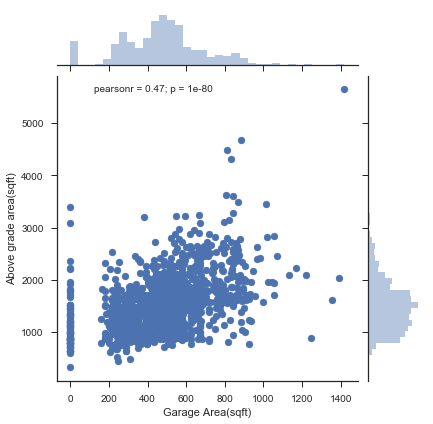

In [302]:
sns.set_style('white')
sns.set_style('ticks')
g = sns.jointplot(x='GarageArea', y='GrLivArea', data=h_p_numerical)
g.set_axis_labels('Garage Area(sqft)','Above grade area(sqft)')

Ground Living Area and Total Basement are positively correlated. The scatter plot shows an increase in Basement area with the increase in Ground living area

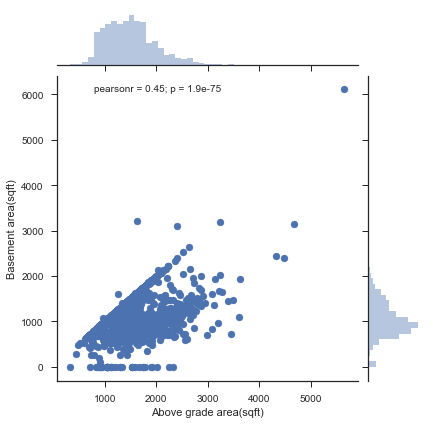

In [307]:
sns.set_style('white')
sns.set_style('ticks')
g = sns.jointplot(x='GrLivArea', y='TotalBsmtSF', data=h_p_numerical)
g.set_axis_labels('Above grade area(sqft)','Basement area(sqft)')

The plot clearly shows a linear relationship between Garage car capacity and Garage area

Of course, it is obvious that bigger garages accommodate more cars

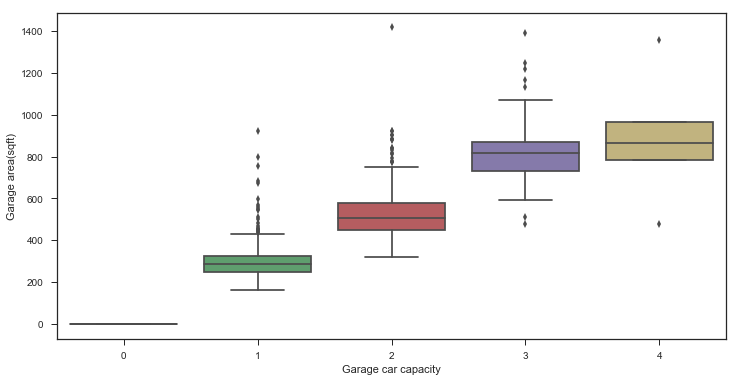

In [306]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.boxplot(x='GarageCars', y='GarageArea', data=h_p_numerical)
g.set(xlabel='Garage car capacity', ylabel='Garage area(sqft)')

There is not much to talk about Garage car capacity and Basment area. There is no relation between them

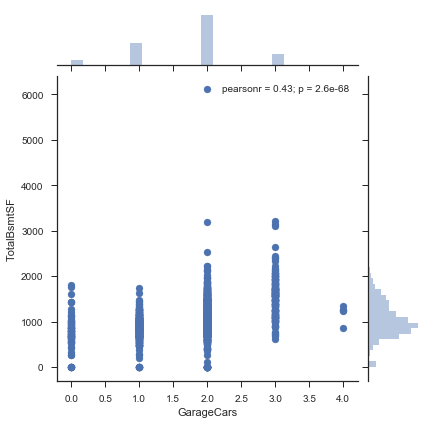

In [283]:
sns.set_style('white')
sns.set_style('ticks')
sns.jointplot(x='GarageCars', y='TotalBsmtSF', data=h_p_numerical)


Clearly garage area and total basement area are positively correlated

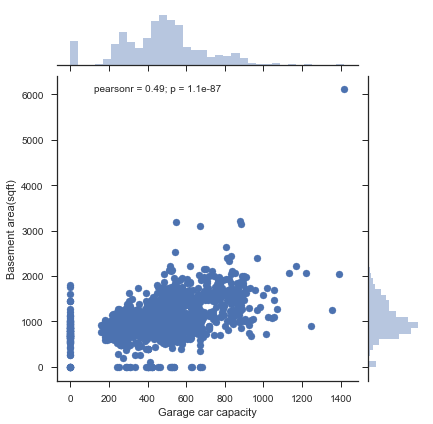

In [311]:
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='GarageArea', y='TotalBsmtSF', data=h_p_numerical)
g.set_axis_labels('Garage car capacity','Basement area(sqft)')

 # Categorical data - EDA

I would like to explore the relationship between all categorical varibales with the output variable i.e. Sale Price

In [322]:
list(h_p_categorical.columns.values)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Floating village residences and Residential low density are expensive compared to others.

Residential low density zone houses are more in number, it also has many outliers, On an average they range between $130,000 - $230,000

Clearly there is no pattern between zones and final sale price


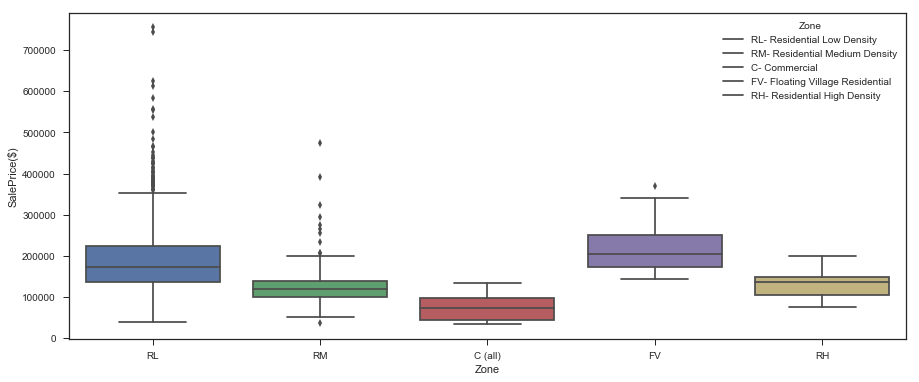

In [400]:
plt.figure(figsize = (15, 6))
c = sns.boxplot(x='MSZoning', y='SalePrice', data=h_p)
c.set(xlabel='Zone', ylabel='SalePrice($)')
c.legend(['RL- Residential Low Density','RM- Residential Medium Density','C- Commercial','FV- Floating Village Residential',
               'RH- Residential High Density'], title='Zone')

There are a very few columns (hardly 5) with category Gravel. This varible might not have any effect on sale price

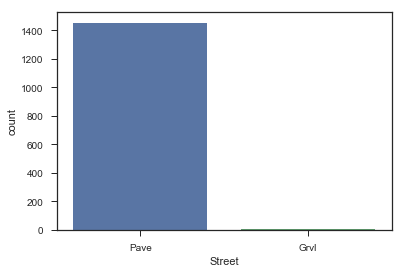

In [370]:
sns.countplot(x='Street', data=h_p)

It appears that Regular lot shapes are least expensive. Irregular shaped lots are comparitively higher, but looks like if the lot has too many flaws they are priced lesser than moderately irregular plots.

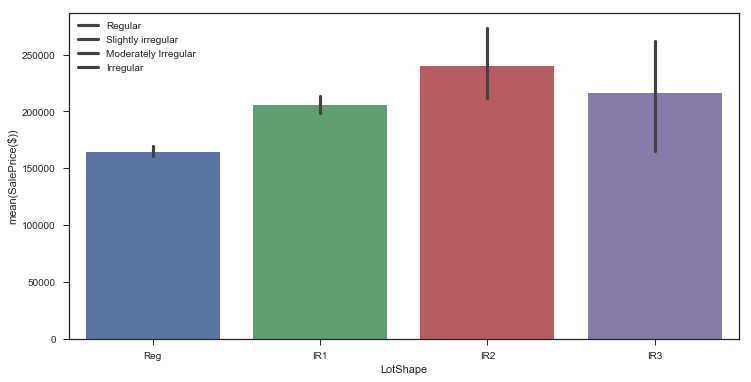

In [411]:
plt.figure(figsize = (12,6))
g = sns.barplot(x='LotShape', y='SalePrice', data=h_p)
g.set(ylabel='mean(SalePrice($))')
g.legend(['Regular','Slightly irregular','Moderately Irregular','Irregular'])

Lots with low flatness and slopes to the sides (lot) tend to be higher in price. 

Though flat lots mostly range between $100,000 to $200,000 it cocnsists of houses priced at $700,000 (these can be considered outliers)

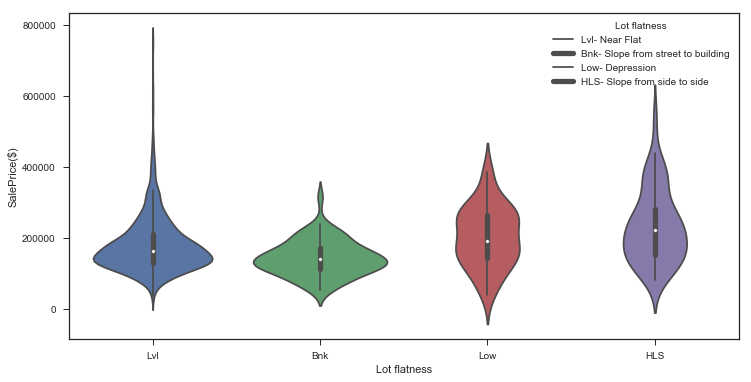

In [405]:
plt.figure(figsize=(12,6))
g = sns.violinplot(x='LandContour', y='SalePrice',data=h_p)
g.set(xlabel='Lot flatness', ylabel='SalePrice($)')
g.legend(['Lvl- Near Flat','Bnk- Slope from street to building','Low- Depression','HLS- Slope from side to side'], 
         title='Lot flatness')

There is only one house with no sewage and water. The other houses have all basic utilities (Electricity, Gas, Water, Sewage)

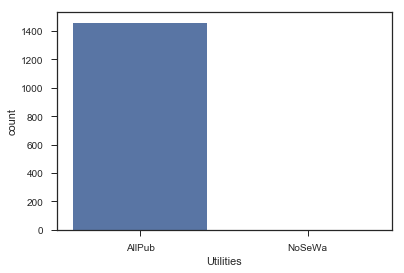

In [385]:
sns.countplot(x='Utilities', data=h_p)

Inside lot, Frontage on 2 sides of property and Corner lots are priced almost equally with a mean price of $170,000

Cul-de-sac houses tend to have the highest average price of about $230,000

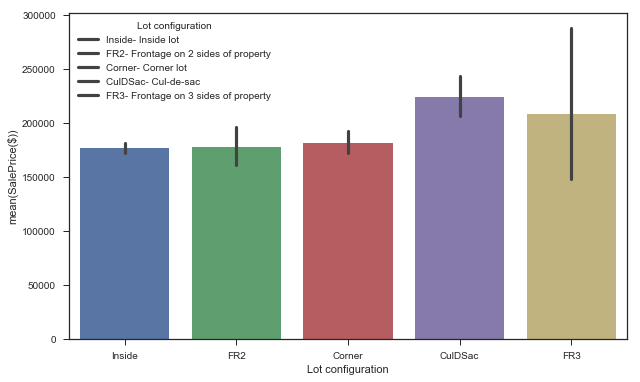

In [413]:
plt.figure(figsize=(10,6))
g = sns.barplot(x='LotConfig', y='SalePrice', data=h_p)
g.set(xlabel='Lot configuration', ylabel='mean(SalePrice($))')
g.legend(['Inside- Inside lot','FR2- Frontage on 2 sides of property','Corner- Corner lot','CulDSac- Cul-de-sac',
          'FR3- Frontage on 3 sides of property'],title='Lot configuration')

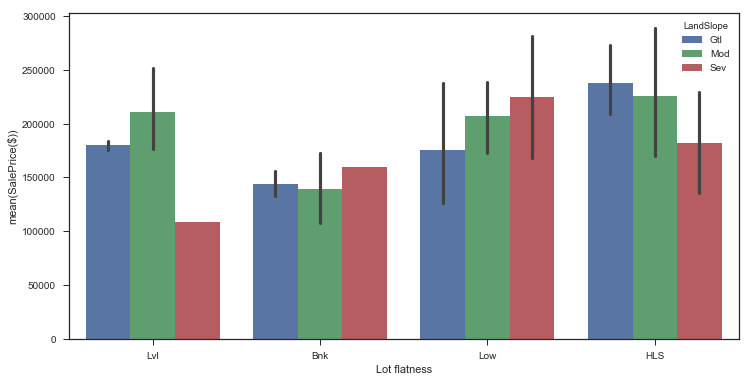

In [421]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='LandContour', y='SalePrice', hue='LandSlope', data=h_p)
g.set(xlabel='Lot flatness', ylabel='mean(SalePrice($))')
#g.legend(['Lvl- Near Flat','Bnk- Slope from street to building','Low- Depression','HLS- Slope from side to side'], 
         #title='Lot flatness', loc='upper left')

# Note: See what you can do with 'LotShape','LandContour', 'LandSlope' and 'LotConfig' in the end


Lowest price range neighborhoods are Mitchell,  Brookside, Sawyer, Iowa DOT and Rail Road, Meadow Village, and Briardale

Neighborhods like College Creek, Veenker, Crawford, Somerset, Northwest Ames, Sawyer West, Timberland, Clear Creek, Bloomington Heights have houses ranging anywhere between 100,000 USD to 350,000 USD (not considering the outliers)

Northridge, Northridge Heights, Stone Brook seem to have high end houses. Most of the houses range from 250,000 USD to 350,00 USD and go upto $75,000 for a few upscale houses.

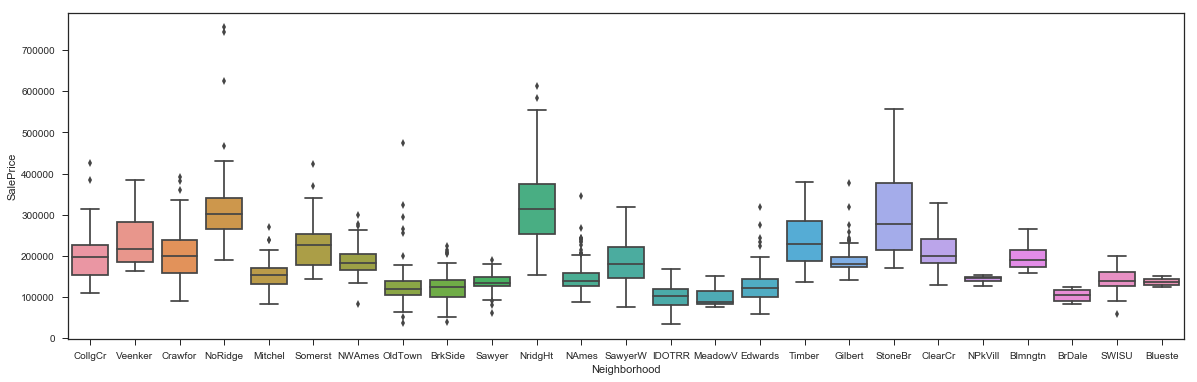

In [423]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=h_p)

Most of the houses fall under Single family or end unit town house, and the sale price for the both ranges from 50,000 USD to 300,000 USD, ignoring the outliers. 

Others settle for duplex, two family conversion or Inside unit town home, which have an avarage sale price ranging from 100,000 USD to 200,000 USD

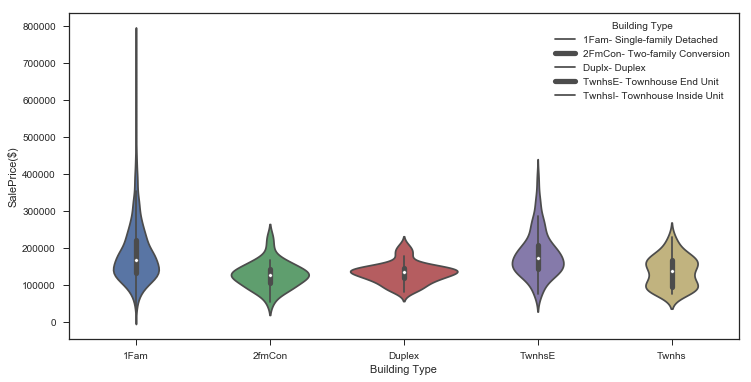

In [442]:
plt.figure(figsize=(12,6))
g = sns.violinplot(x='BldgType', y='SalePrice',data=h_p)
g.set(xlabel='Building Type', ylabel='SalePrice($)')
g.legend(['1Fam- Single-family Detached','2FmCon- Two-family Conversion','Duplx- Duplex','TwnhsE- Townhouse End Unit',
          'TwnhsI- Townhouse Inside Unit'], title='Building Type')

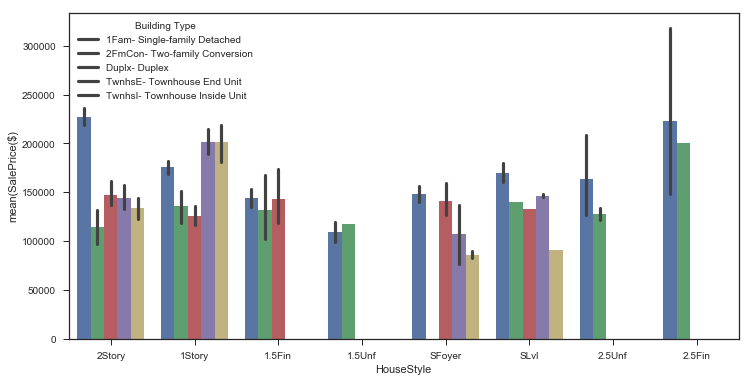

In [491]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='HouseStyle', y='SalePrice', hue='BldgType',data=h_p)
g.set(ylabel='mean(SalePrice($)')
g.legend(['1Fam- Single-family Detached','2FmCon- Two-family Conversion','Duplx- Duplex','TwnhsE- Townhouse End Unit',
          'TwnhsI- Townhouse Inside Unit'], title='Building Type')

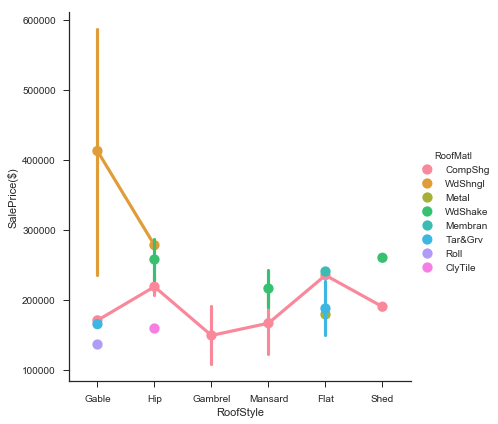

In [494]:
#plt.figure(figsize=(20,6))
g= sns.factorplot(x='RoofStyle', y='SalePrice', hue='RoofMatl', data=h_p,size=6)
g.set(ylabel='SalePrice($)')
#g.legend(['CompShg- Standard Composite Shingle','WdShngl- Wood Shingles','WdShake- Wood Shakes','Membran- Membrane',
          #'Tar&Grv- Gravel & Tar','ClyTile	Clay or Tile'], title='Roof Material')

Face brick and Common brick both range between 100,000 USD to 300,000 USD, with majority of the houses priced at approximately $180,000. 

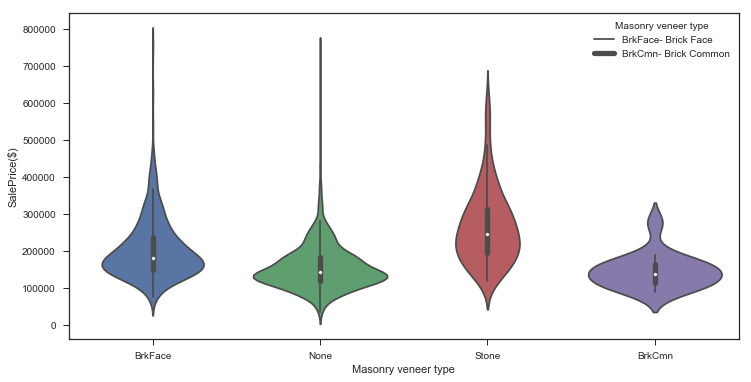

In [496]:
plt.figure(figsize=(12,6))
g = sns.violinplot(x='MasVnrType', y='SalePrice',data=h_p)
g.set(xlabel='Masonry veneer type', ylabel='SalePrice($)')
g.legend(['BrkFace- Brick Face','BrkCmn- Brick Common'], title='Masonry veneer type')

We can infer that exterior condition with Average and above average rating are priced at $180,000 approximately. This also tells us we can reduce the categories to Good and Poor instead of having five different categories

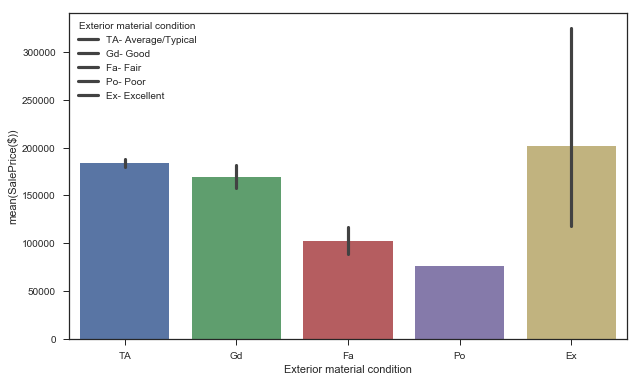

In [499]:
plt.figure(figsize=(10,6))
g= sns.barplot(x='ExterCond', y='SalePrice', data=h_p)
g.set(xlabel='Exterior material condition', ylabel='mean(SalePrice($))')
g.legend(['TA- Average/Typical','Gd- Good','Fa- Fair','Po- Poor','Ex- Excellent'],title= 'Exterior material condition')

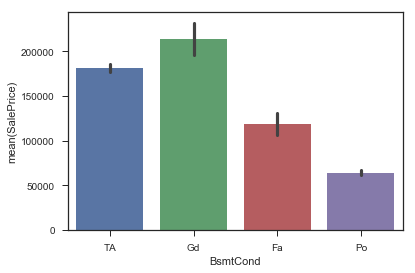

In [507]:
sns.barplot(x='BsmtCond', y='SalePrice', data=h_p)

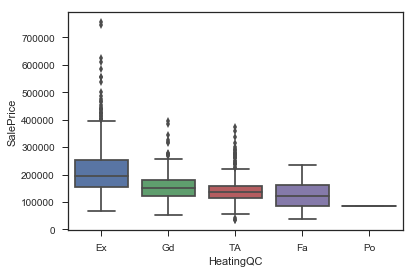

In [508]:
sns.boxplot(x='HeatingQC', y='SalePrice', data=h_p)

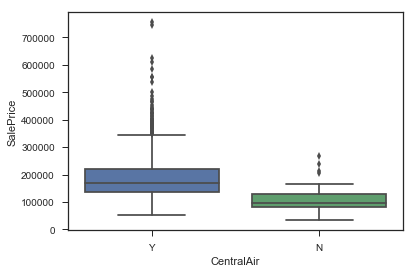

In [509]:
sns.boxplot(x='CentralAir', y='SalePrice', data=h_p)

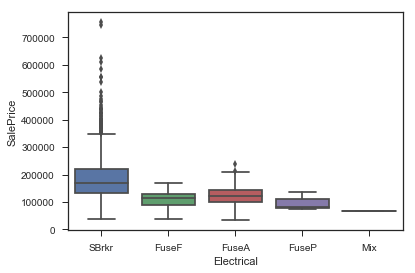

In [510]:
sns.boxplot(x='Electrical', y='SalePrice', data=h_p)

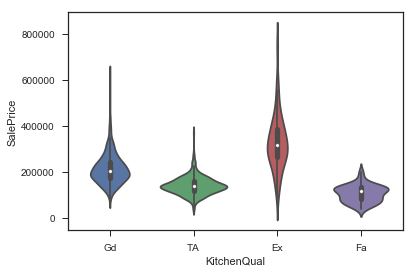

In [512]:
sns.violinplot(x='KitchenQual', y='SalePrice', data=h_p)

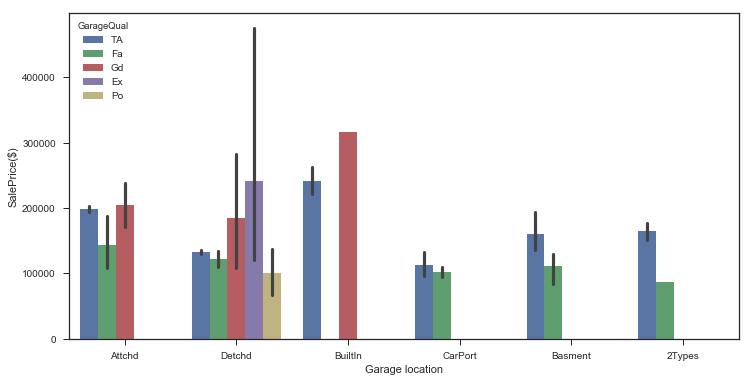

In [524]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='GarageType', y='SalePrice', hue='GarageQual', data=h_p)
g.set(xlabel='Garage location', ylabel='SalePrice($)')
#g.legend(['RFn- Rough Finished','Unf- Unfinished','Fin- Finished'], title='Garage Quality')

In [ ]:
#--------------------------------------------------------------

In [ ]:
# Findings - Most of the houses (more than 500) are built in the year 1946, and modified to the latest standards
sns.distplot(h_p['MSSubClass'], kde=False, rug=False)

In [ ]:
h_p.sort_values(['SalePrice'], ascending = False)

In [ ]:
sns.boxplot(x=h_p['SalePrice'])

In [ ]:
sns.distplot(h_p['SalePrice'], kde=False, rug=True)

In [ ]:
plt.boxplot(h_p['SalePrice'])

In [ ]:
plt.boxplot(h_p['MSSubClass'])

In [ ]:
plt.hist(h_p['OverallQual'])
plt.show()

In [ ]:
h_p.isnull().sum()>500

In [ ]:
h_p['LotArea'].mean()

In [ ]:
h_p['LotArea'].median()

In [ ]:
h_p['LotArea'].std()

In [ ]:
plt.hist(h_p['LotArea'], bins=50)

In [ ]:
# DataFrame with required columns for further analysis
h_pdf.head()

In [ ]:
h_pdf.dtypes

In [ ]:
# DataFrame doesn't have any null values, except for the 'BsmtCond' column that has value 'NA' for 'No Basement'
# I have changed 'NA' to 'NB' - 'No Basement'
h_pdf['BsmtCond'].fillna('NB')

In [ ]:
a = 

In [ ]:
a

In [ ]:
# Knowing the preference of neighborhood for every possible house buyer is a difficult task. 
# The data being limited I have decided to omit this column('Neighborhood') in my further analysis
h_pdf1 = h_pdf.drop('Neighborhood', axis=1)

In [ ]:
h_pdf1.head()

In [ ]:
h_pdf1['BsmtCond'].unique()

In [ ]:
h_p['BsmtCond'].head(50)

In [ ]:
h_p['BsmtCond'].unique()

In [ ]:
#pd.get_dummies(h_pdf1, columns=['BsmtCond'])